# Pymaceuticals Inc.
---

### Analysis

This was a study measuring tumor growth of 248 mice on a regimen of 10 different treatments: 9 drugs and 1 placebo. All drug regimens were represented fairly evenly across this study, with the highest percentage of mice given Capomulin. Additionally, the sex of mice were split almost completely evenly between male (51%) and female (49%). 

Singling out one mice in particular, l509, we see that its tumor volume kept increasing until the 20 day mark, until a sharp decrease (interrupted by a small uptick) which lasted for about 15 days. Afterward, there seemed to be signs of tumor resurgence. It appears that Capomulin took about 20 days to take effect. Given that the mouse saw a small amount of tumor growth interrupt its overall tumor shrinkage, it's unclear whether or not the growth at the end of the study would follow the same pattern -- it takes place over a longer period of time than the interruption, and follows a steadier path of growth.

Overall, Capomulin and Ramicane seemed to have the greatest effect at shrinking tumors and/or staving off tumor growth.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_data_complete.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(mouse_metadata)

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
repeated_mouse = "g989"
all_repeated_mouse = mouse_data_complete[mouse_data_complete["Mouse ID"] == repeated_mouse]
all_repeated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_data_complete[mouse_data_complete.isin(duplicate_mice) ==False]
clean_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean_tv = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_median_tv = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_variance_tv = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_standev_tv = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_sem_tv = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stats = pd.DataFrame({

"Mean Tumor Volume": drug_mean_tv,
"Median Tumor Volume": drug_median_tv,
"Tumor Volume Variance": drug_variance_tv,
"Tumor Volume Std. Dev.": drug_standev_tv,
"Tumor Volume Std. Err.": drug_sem_tv

})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_ag = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
summary_stats_ag

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

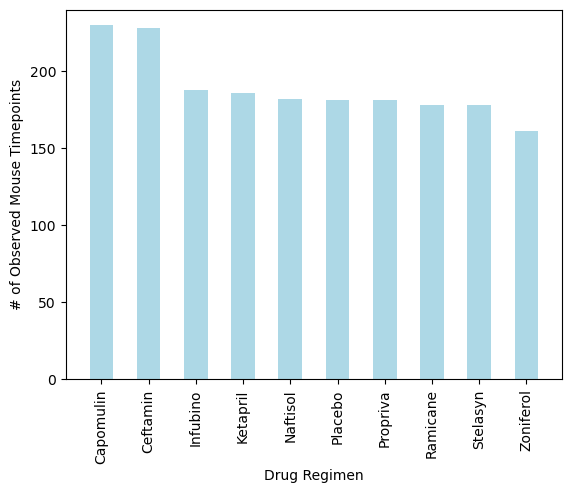

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
        #pandas has its role of massaging data (manipulation & mgmt), pyplot has its role of visualizing the data
# I'll be using plt for both pandas and pyplot charts
#find differences "generating a bar graph using pandas" vs "generating a bar graph using pyplot" and comparing

import numpy as np

drugs = ["Capomulin", "Ceftamin", "Infubino", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drug_regimen_amounts = clean_mice["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_regimen_amounts))
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drugs)
plt.xticks(rotation=90, ha="center")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_amounts)+10)

plt.bar(x_axis, drug_regimen_amounts, color="lightblue", align="center", width=.5)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


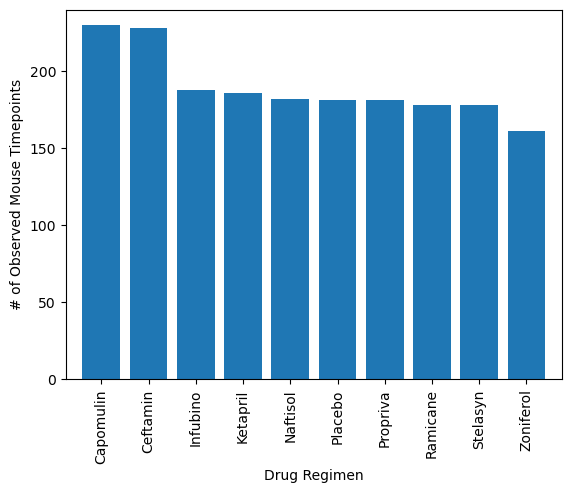

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drugs = ["Capomulin", "Ceftamin", "Infubino", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drug_counts = clean_mice["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_counts))

plt.bar(drugs, drug_counts)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_counts)+10)

plt.xticks(rotation=90, ha="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


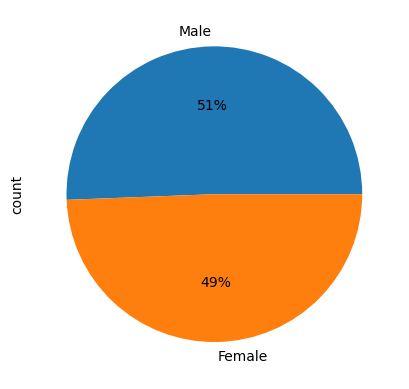

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

f_and_m = ["Male", "Female"]
f_and_m_group = clean_mice["Sex"].value_counts()
f_and_m_group.plot(kind="pie",y=f_and_m, autopct="%1.0f%%")
plt.show()

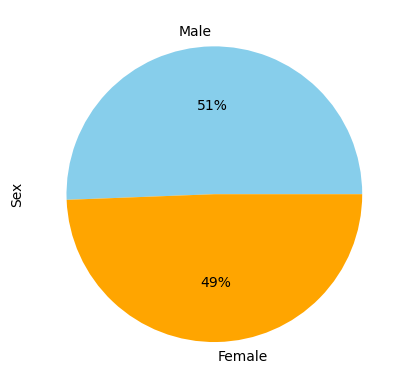

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
f_and_m = ["Male", "Female"]
f_and_m_group = clean_mice["Sex"].value_counts()
colors = ["skyblue", "orange"]
plt.pie(f_and_m_group, labels=f_and_m, colors=colors,autopct="%1.0f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

        #df.loc[df['column_name'].isin(some_values)]
        #drugs_final_tv = clean_mice.loc[clean_mice["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
        #last_timepoint = clean_mice.groupby("Mouse ID")["Timepoint"].max()
                #last_timepoint is 248 long
        #last_volume = clean_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
        #last_volume is 248 long
        #clean_mice_tv = pd.merge(drugs_final_tv, last_timepoint, how="left", on="Mouse ID")
        #clean_mice_tv.rename(columns={"Timepoint_x":"Timepoint", "Timepoint_y":"Last Timepoint"}, inplace=True)
                #clean_mice_tv = clean_mice_tv[['Mouse ID','Timepoint', 'Tumor Volume (mm3)',
                #'Metastatic Sites','Last Timepoint','Drug Regimen','Sex','Age_months','Weight (g)']]
        #clean_mice_tv = clean_mice_tv[['Mouse ID','Tumor Volume (mm3)','Last Timepoint','Drug Regimen']]
        #clean_mice_tv = pd.merge(drugs_final_tv, last_timepoint, how="left", on="Mouse ID")

        #I SHOULD ONLY HAVE 248 ROWS, SINCE THAT'S HOW MANY MICE THERE ARE


# Start by getting the last (greatest) timepoint for each mouse
final_tumor = clean_mice.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor = final_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_mice_ftv = final_tumor.merge(clean_mice, on=["Mouse ID", "Timepoint"], how="left")
clean_mice_ftv



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tv_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = clean_mice_ftv.loc[clean_mice_ftv["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tv_list.append(final_tumor_volume)

    # Determine outliers using upper and lower bounds

    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume<lower_bound) | (final_tumor_volume>lower_bound) ]
    print(f"{drug}'s potential outliers: {outliers}")



Capomulin's potential outliers: 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infub

Text(0, 0.5, 'Final Tumor Volume (mm3)')

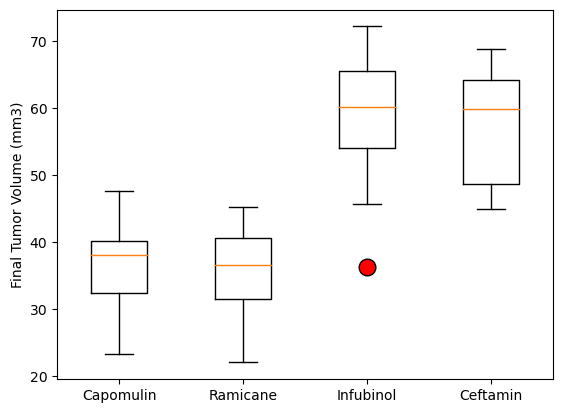

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = dict(markerfacecolor="red", markersize=12)
plt.boxplot(tv_list, labels=drugs_list, flierprops= boxplot)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

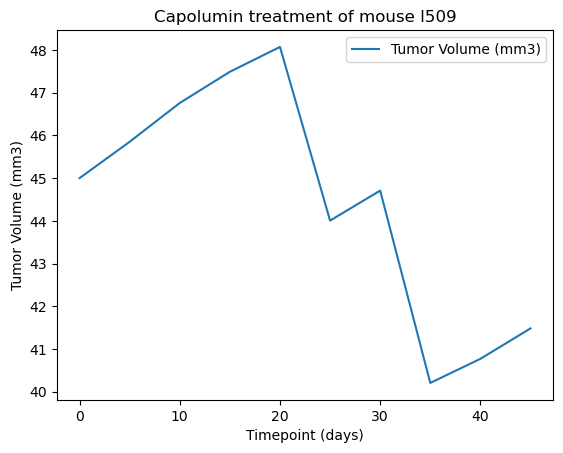

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#generate for l509 (L, not i)

cap_mouse_l509 = clean_mice[clean_mice["Mouse ID"]=="l509"]
cap_mouse_l509.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.title("Capolumin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

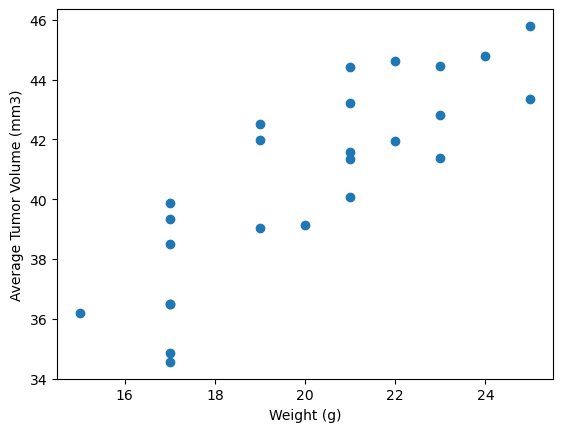

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_regimen = clean_mice[clean_mice["Drug Regimen"]=="Capomulin"]
weight_vs_volume = cap_regimen.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
x_values = weight_vs_volume["Weight (g)"]
y_values = weight_vs_volume["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


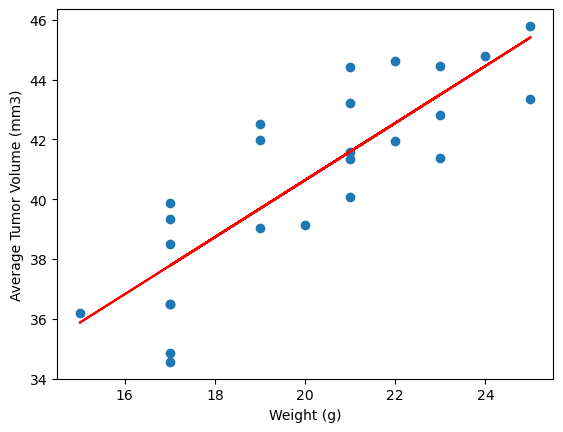

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

cap_regimen = clean_mice[clean_mice["Drug Regimen"]=="Capomulin"]
weight_vs_volume = cap_regimen.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
x_values = weight_vs_volume["Weight (g)"]
y_values = weight_vs_volume["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()
